# 双Y轴坐标系
我们学习了Matplotlib的绘图流程和常用设置以及常见统计图的绘制方法。  
同时，我们也发现Matplotlib绘制出的图形中会存在一些问题，例如：如何绘制双Y轴坐标系？如何去掉图形默认的边框？以及如何移动坐标到指定位置？  
本节课我们将着重解决上面的几个问题。 
![](./picture/12-1.png)
## 绘制双Y轴坐标系
在进行数据分析时，有时候我们需要在同一个坐标图中比较两种数据在时间序列上的关系。  
由于两种数据的单位和数据并不统一，也是不同的类型的数据，因此我们不能用一个Y轴来共同衡量两类不同的数据，这时候我们就需要绘制双Y轴图。  
下面我们使用某上市公司股票日线部分数据，数据路径为./data/600001SH.xlsx。  
运行下方代码，我们了解一下数据的基本情况：  

In [2]:
import pandas as pd
datas = pd.read_excel('./data/600001SH.xlsx')
print(datas.shape)
datas.head()

(105, 13)


,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元)
0,600004.SH,白云机场,2015/01/04,14.23,14.28,14.28,12.81,13.04,12091206,166226459,-1.19,-8.3626,13.7477
1,600004.SH,白云机场,2015/01/05,13.04,12.79,13.33,12.60,13.14,17396695,227096572,0.10,0.7669,13.0540
2,600004.SH,白云机场,2015/01/06,13.14,13.17,13.45,13.06,13.43,9676196,127728786,0.29,2.2070,13.2003
3,600004.SH,白云机场,2015/01/07,13.43,13.23,13.23,12.35,12.42,2315000,29774567,-1.01,-7.5205,12.8616
4,600004.SH,白云机场,2015/01/08,12.42,12.60,12.84,12.15,12.70,18756201,235967215,0.28,2.2544,12.5808


我们的目的是研究二月份某公司的每日收盘价以及对应的成交量，所以方便分析，需要在一个双Y轴坐标图中同时绘制出收盘价和成交量的时间序列图。  
首先，需要将日期列设置成数据的索引，方便我们后续按照日期获取数据。  
代码片段  
#### 将日期设置为index
```
datas.index = pd.to_datetime(datas['日期'])
```
然后，将二月份的数据获取出来。
代码片段

#### 获取二月份的数据
```
feb_datas = datas['2015-02']
```
请抄写上面代码到代码框，并运行。

In [6]:
import pandas as pd
datas = pd.read_excel('./data/600001SH.xlsx')
# print(datas.shape)
# datas.head()
datas.index = pd.to_datetime(datas['日期'])
feb_datas = datas['2015/02']
feb_datas.head()

,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元)
日期,,,,,,,,,,,,,
2015-02-01,600004.SH,白云机场,2015/02/01,12.21,12.20,12.20,11.88,11.95,3517054,42276932,-0.26,-2.1294,12.0206
2015-02-02,600004.SH,白云机场,2015/02/02,11.95,11.97,12.27,11.97,12.20,4773381,58184890,0.25,2.0921,12.1895
2015-02-03,600004.SH,白云机场,2015/02/03,12.20,12.15,12.42,12.07,12.36,5981827,73534474,0.16,1.3115,12.2930
2015-02-04,600004.SH,白云机场,2015/02/04,12.36,12.34,12.62,12.34,12.54,3993191,49790098,0.18,1.4563,12.4687
2015-02-05,600004.SH,白云机场,2015/02/05,12.54,12.51,12.59,12.29,12.35,3120900,38963332,-0.19,-1.5152,12.4846


万事俱备，接下来看看双y轴绘制的关键函数：twinx()。  
twinx()函数表示共享x轴，共享表示的就是x轴使用同一刻度线。  
接下来，我们先把每日收盘价的折线图绘制出来：  

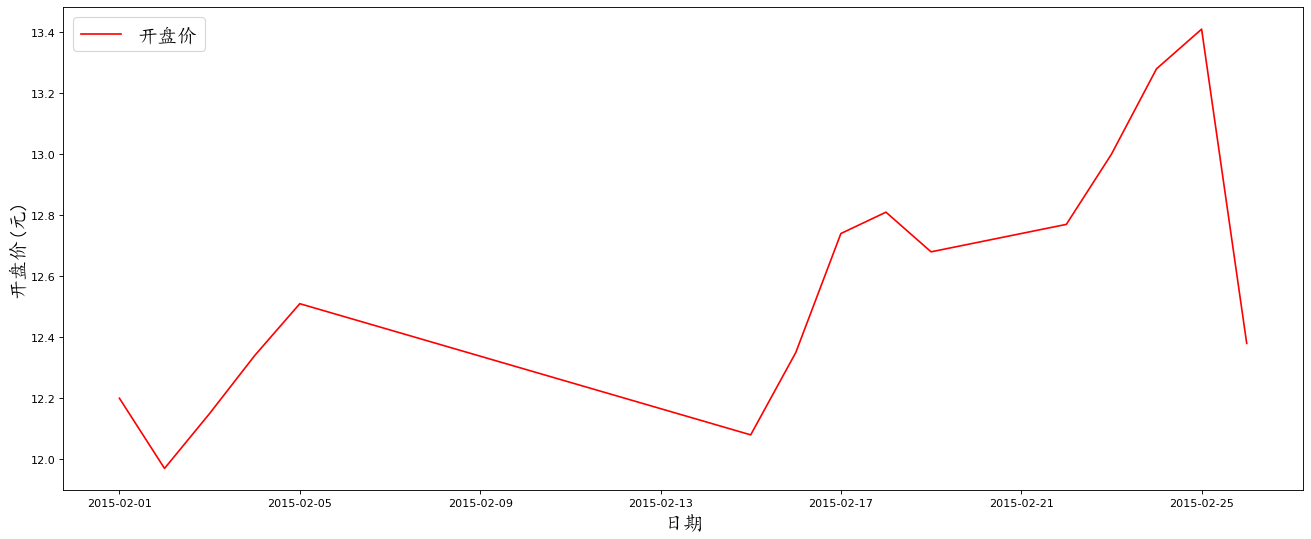

In [8]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname='./data/simkai.ttf',size=18)

# 获取数据
datas = pd.read_excel('./data/600001SH.xlsx')
datas.index = pd.to_datetime(datas['日期'])
feb_datas = datas['2015-02']

# 绘制图形
fig = plt.figure(figsize=(20,8),dpi=80)
ax = fig.add_subplot(111)
lin1 = ax.plot(feb_datas.index.tolist(),feb_datas['开盘价(元)'].values.tolist(),label='开盘价',color='red')
ax.legend(prop=my_font,loc=0)
ax.set_ylabel("开盘价(元)",fontproperties=my_font)
ax.set_xlabel("日期",fontproperties=my_font)
plt.show()

大家可能已经注意到在代码中，我们使用add_subplot添加了Axes坐标轴实例。  
因为，我们会使用这个Axes坐标轴实例去调用twinx()函数，从而实现两个Y轴共享一个X轴的效果。  
代码片段  
```
ax2 = ax.twinx()
```
ax.twinx()是在ax的坐标轴内创建一个共享X轴的的坐标轴实例。  
所以我们可以在ax2的坐标轴实例中绘制每日成交量的折线图。  
代码片段  
```
lin2 = ax2.plot(feb_datas.index.tolist(),feb_datas['成交量(股)'].values.tolist(),label='成交量(股)')
```
现在，大家用上面的方法，尝试在下方代码框中绘制双Y轴坐标系。

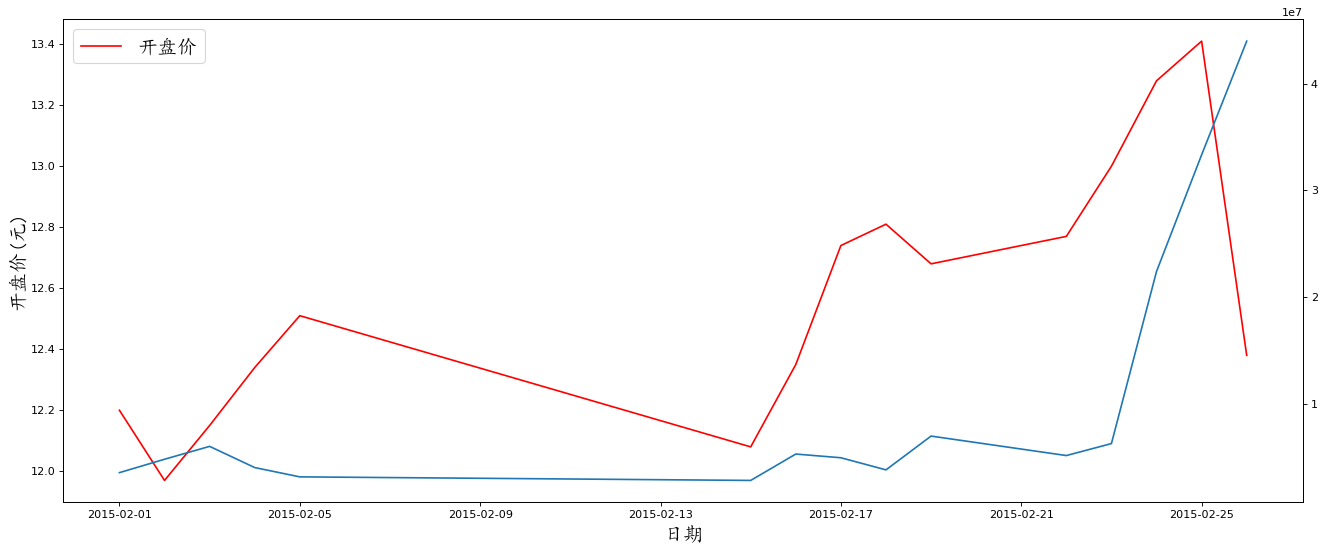

In [10]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname='./data/simkai.ttf',size=18)

# 获取数据
datas = pd.read_excel('./data/600001SH.xlsx')
datas.index = pd.to_datetime(datas['日期'])
feb_datas = datas['2015-02']

# 绘制图形
fig = plt.figure(figsize=(20,8),dpi=80)
ax = fig.add_subplot(111)
ax2= ax.twinx()
lin1 = ax.plot(feb_datas.index.tolist(),feb_datas['开盘价(元)'].values.tolist(),label='开盘价',color='red')
lin2 = ax2.plot(feb_datas.index.tolist(),feb_datas['成交量(股)'].values.tolist(),label='成交量(股)')
ax.legend(prop=my_font,loc=0)
ax.set_ylabel("开盘价(元)",fontproperties=my_font)
ax.set_xlabel("日期",fontproperties=my_font)
plt.show()

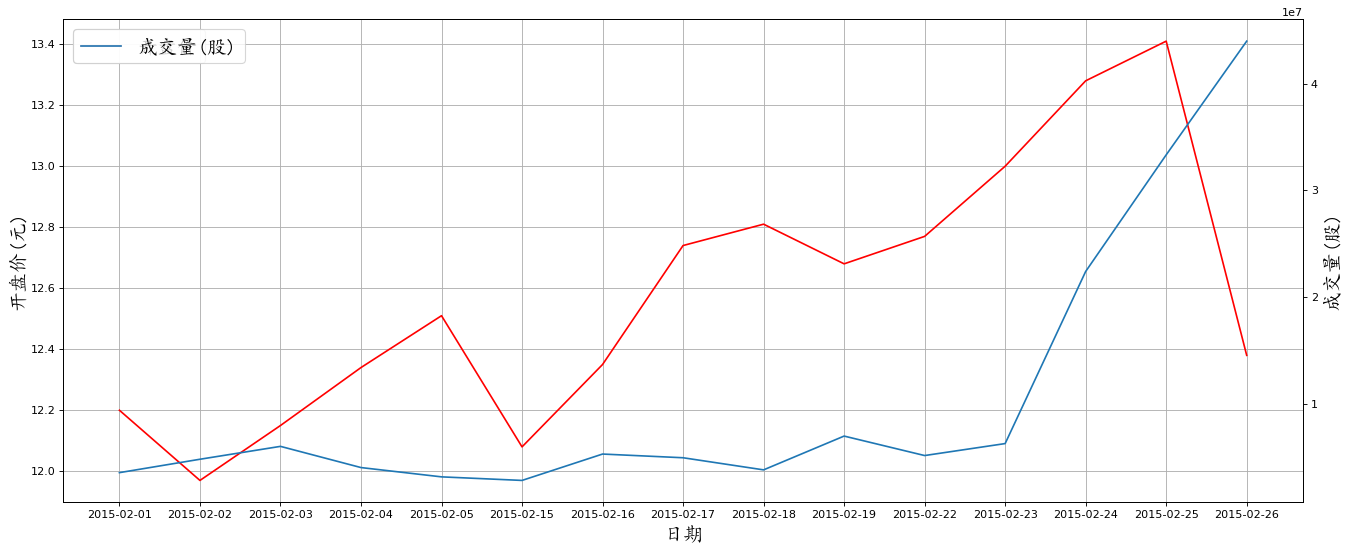

In [12]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname='./data/simkai.ttf',size=18)

# 获取数据
datas = pd.read_excel('./data/600001SH.xlsx')
datas.index = pd.to_datetime(datas['日期'])
feb_datas = datas['2015-02']

# 绘制图形
fig = plt.figure(figsize=(20,8),dpi=80)
ax = fig.add_subplot(111)
lin1 = ax.plot(feb_datas.index.strftime('%Y-%m-%d').tolist(),feb_datas['开盘价(元)'].values.tolist(),label='开盘价',color='red')
ax.set_ylabel("开盘价(元)",fontproperties=my_font)
ax.set_xlabel("日期",fontproperties=my_font)
ax.legend(prop=my_font)

ax2 = ax.twinx()
lin2 = ax2.plot(feb_datas.index.strftime('%Y-%m-%d').tolist(),feb_datas['成交量(股)'].values.tolist(),label='成交量(股)')
ax2.legend(prop=my_font)
ax2.set_ylabel("成交量(股)",fontproperties=my_font)

# 绘制网格
ax.grid()
plt.show()

因为是共享X轴，所以只用ax.set_xlabel()就可以设置X轴的标题。  
由于Y轴不共享，所以每一个坐标系的Y轴标题都要使用set_xlabel()方法设置一次。  
代码中，我们设置了两次图例的显示，所以出现了两个图例重叠的现象，所以我们需要合并图例。  
合并图例的方法就是仅使用一个轴的legend()函数。  
代码片段  
```
# 合并图例
lns = lin1+lin2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, prop=my_font)
```
lin1和lin2分别是两个绘图方法plot()的返回值，即折线对象。需要注意的是，lin1和lin2的类型是list。  
legend()方法可以指定图例中有哪些值  
第一个参数lns表示将图中的多个线以列表的形势传进去。  
第二个参数labs表示将图例的名字以列表的形势传进去。  
运行下面的代码，观察一下合并图例之后的图形：  


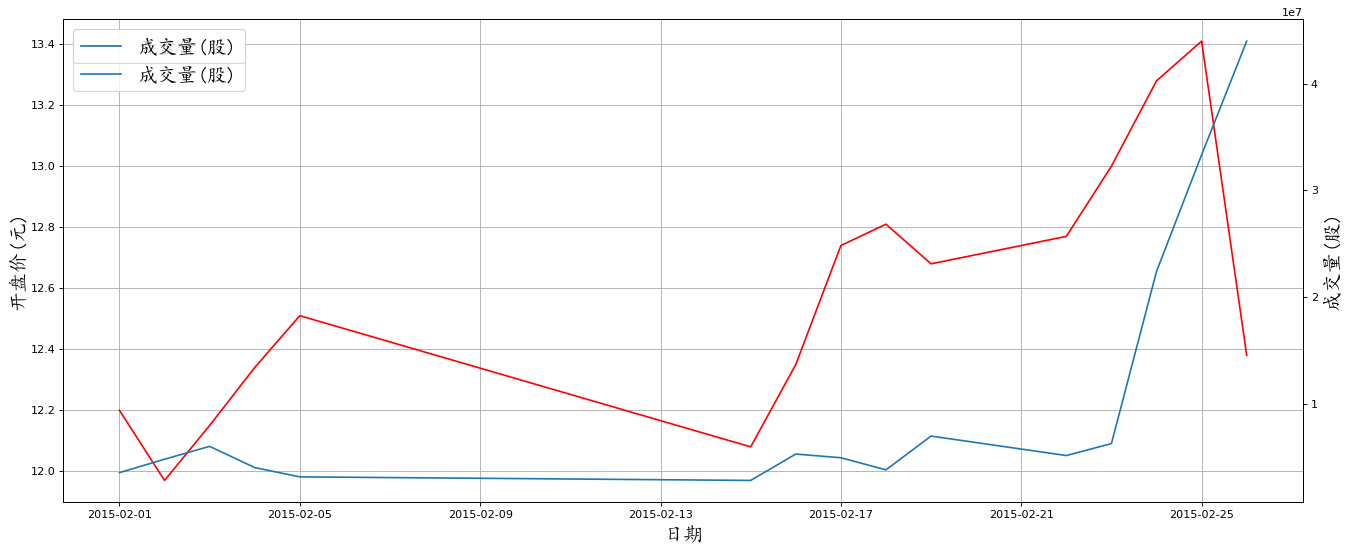

In [14]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname='./data/simkai.ttf',size=18)

# 获取数据
datas = pd.read_excel('./data/600001SH.xlsx')
datas.index = pd.to_datetime(datas['日期'])
feb_datas = datas['2015-02']

# 绘制图形
fig = plt.figure(figsize=(20,8),dpi=80)
ax = fig.add_subplot(111)
lin1 = ax.plot(feb_datas.index.tolist(),feb_datas['开盘价(元)'].values.tolist(),label='开盘价',color='red')
ax.legend(prop=my_font)

ax2 = ax.twinx()
lin2 = ax2.plot(feb_datas.index.tolist(),feb_datas['成交量(股)'].values.tolist(),label='成交量(股)')

ax2.legend(prop=my_font)
ax2.set_ylabel("成交量(股)",fontproperties=my_font)
ax.set_ylabel("开盘价(元)",fontproperties=my_font)
ax.set_xlabel("日期",fontproperties=my_font)

# 合并图例
lns = lin1+lin2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, prop=my_font)

# 绘制网格
ax.grid()
plt.show()

![](./picture/12-2.png)
上图中，一个是Matplotlib默认绘制出的图像，另一个是修改了Matplotlib的一些默认显示方式。  
经过前面的学习我们发现，Matplotlib在绘制图形的时候会默认显示上面和右侧的边框，以及坐标轴的颜色默认是黑色。  
如果想要去掉默认的边框，通过plt.gca()获得当前的Axes对象。  
代码片段  
```
ax = plt.gca()
```
使用spines属性获取到对应的边框。  
代码片段  
```
ax.spines['right']  
```
right右边框、left左边框、top上边框、bottom下边框。  
通过set_color('none')方法可以设置边框的颜色。  
代码片段  
```
ax.spines['right'].set_color('none')
```
对于颜色的设置，none表示无色，也可以用red、blue等样式的英语单词或者是十六进制的颜色值#0000FF。   
运行下面的代码，给边框换个颜色：   
重置   
分享   


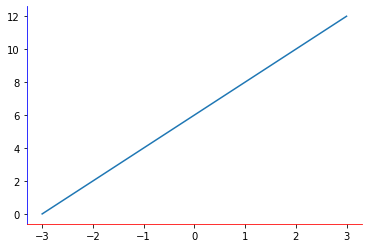

In [16]:
import matplotlib.pyplot as plt
y = range(0,14,2) 
x = [-3,-2,-1,0,1,2,3]

# 获得当前图表的图像
ax = plt.gca()

# 设置图型的包围线
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('red')
ax.spines['left'].set_color('#0000FF')

plt.plot(x,y)
plt.show()

我们已经成功的设置边框的颜色，但是还有一个问题就是坐标轴的交叉点也是默认设置的。  
如果想要X轴的0点，和Y轴的0点交叉，需要使用set_position方法移动坐标轴的位置。  
代码片段  
```
ax.spines['bottom'].set_position(('data', 0))
```
设置底边的移动范围，移动到Y轴的0位置。  
data:移动轴的位置到交叉轴的指定坐标。  
运行下面的代码，移动X轴和Y轴到（0，0）点。  

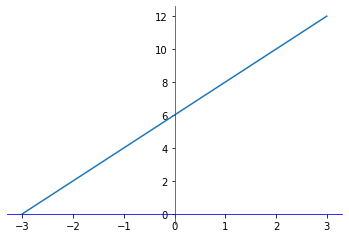

In [19]:
import matplotlib.pyplot as plt
import numpy as np
y = range(0,14,2) # x轴的位置
x = [-3,-2,-1,0,1,2,3]
# plt.figure(figsize=(20,8),dpi=80)

# 获得当前图表的图像
ax = plt.gca()

# 设置图型的包围线
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('blue')
ax.spines['left'].set_color('red')

ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

plt.plot(x,y)
plt.show()

# 本节总结
本节课的内容到这里就结束了，我们主要讲解了如何绘制双Y轴坐标系，如何去掉图形默认的边框，以及如何移动坐标到指定位置。  
下面，我们总结一下本节课的主要知识点：  
![](./picture/12-3.png)
下节预告
![](./picture/12-4.png)

## 第一步:明确目标
绘制出一个段完整的正弦函数，如下图所示，不要显示坐标周以及刻度值。  
## 第二步:分析过程
下面是需要用到的函数： numpy.linspace(start, stop, num=50)在指定的间隔内返回均匀间隔的数字，返回num均匀分布的样本，在[start, stop]。 numpy.sin(x)是numpy的提供的计算正弦值的函数。  
## 第三步:代码实现

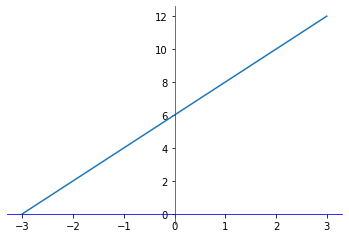

In [21]:
import matplotlib.pyplot as plt
import numpy as np
y = range(0,14,2) # x轴的位置
x = [-3,-2,-1,0,1,2,3]
# plt.figure(figsize=(20,8),dpi=80)

# 获得当前图表的图像
ax = plt.gca()

# 设置图型的包围线
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('blue')
ax.spines['left'].set_color('red')

ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

plt.plot(x,y)
plt.show()

## 题目要求
本练习继续使用某电商超市从2016年到2019年的部分销售数据，路径为：/data/Commerce.xls。
## 题目讲解
请用一张图绘制出2018年各地区销售总额及增长率。
## 书写代码

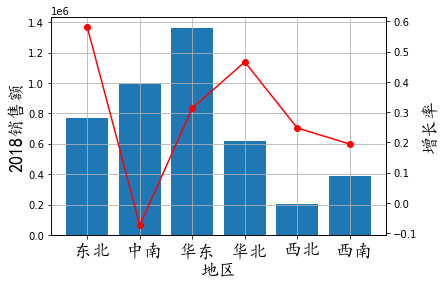

In [22]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname='./data/simkai.ttf',size=18)

data = pd.read_excel('./data/Commerce.xls')
# 将订单日期设置为数据的索引
data.index = data['订单日期']

# 2018年各季度各地区的总销售额
area_sales18 = data['2018'].groupby('地区')['销售额'].sum()

# 2017年各季度各地区的总销售额
area_sales17 = data['2017'].groupby('地区')['销售额'].sum()

# 增长率 = (area_sales18- area_sales17)/area_sales17
growth_rate = (area_sales18-area_sales17)/area_sales17

fig = plt.figure()
ax = fig.add_subplot(111)
lin1 = ax.bar(area_sales18.index,area_sales18.values)

ax.set_ylabel("2018销售额",fontproperties=my_font)
ax.set_xlabel("地区",fontproperties=my_font)
plt.xticks(growth_rate.index,fontproperties=my_font)

ax2 = ax.twinx()
lin2 = ax2.plot(growth_rate.index,growth_rate.values,color='red',marker='o')
ax2.set_ylabel("增长率",fontproperties=my_font)

# 绘制网格
ax.grid()
plt.show()